In [2]:
# 整理数据的库
import pandas as pd
# 数据分析的库
from scipy.stats import chi2_contingency #卡方检验
from scipy.stats import chi2 #画卡方分布图
# 画图
import seaborn as sns


卡方检验统计量：$$\chi ^ { 2 } = \sum \frac { ( f _ { o } - f _ { e } ) ^ { 2 } } { f _ { e } }$$
其中，	 $f _ { o }$  = 观察频数； $f _ { e }$  = 期望频数


卡方检验的自由度为df = (R-1)(C-1)，R和C分别是两个分类型变量的类别量


# 卡方分布图

In [7]:
# 生成样本量为1000000服从卡方分布的数值
x_1 = chi2.rvs(df=1, size=1000000) #自由度为1
x_2 = chi2.rvs(df=5, size=1000000) #自由度为5


<AxesSubplot: ylabel='Density'>

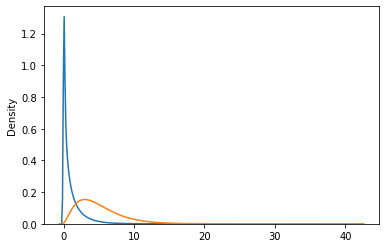

In [8]:
sns.kdeplot(x_1,color="blue")
sns.kdeplot(x_2,color="orange")


# 性别与电脑类型偏好

In [9]:
gender = ["female"]*120 + ["male"]*180 
pc_type = ["mac"]*12 + ["windows"]*108 + ["mac"]*24 + ["windows"]*156

In [10]:
df = pd.DataFrame(
    {
        "gender":gender,
        "pc_type":pc_type
    }
)

## 列联表（交叉表）

In [11]:
crosstab =pd.crosstab(df.gender,df.pc_type)
crosstab

pc_type,mac,windows
gender,,
female,12,108
male,24,156


In [12]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 

In [14]:
# 卡方值
print("chiq = " + str(stat))

chiq = 0.4748000841750843


In [13]:
# p值
print("p = " + str(p))

p = 0.4907871540801906


In [15]:
expected

array([[ 14.4, 105.6],
       [ 21.6, 158.4]])

# 泰坦尼克号的例子

In [3]:
gender = ["female"]*470 + ["male"]*1738
life_status = ["survival"]*344 + ["death"]*(470-344) + ["survival"]*374 + ["death"]*(1738-374)
df_titanic = pd.DataFrame({
    "gender": gender,
    "life_status": life_status,
})

In [4]:
crosstab_titanic =pd.crosstab(df_titanic.gender,df_titanic.life_status)
crosstab_titanic

life_status,death,survival
gender,,
female,126,344
male,1364,374


In [6]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab_titanic) 

In [7]:
stat

447.7959483713239

In [10]:
p

2.1766108525434843e-99

In [11]:
expected

array([[ 317.16485507,  152.83514493],
       [1172.83514493,  565.16485507]])